In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

We will create a standard rect() signal, pad it with zeros on both sides. Assuming the resulting signal has a period 2L, we will obtain the Fourier series for it. The end result is visualizing the Fourier series coefficients (cks of the exponentials). 

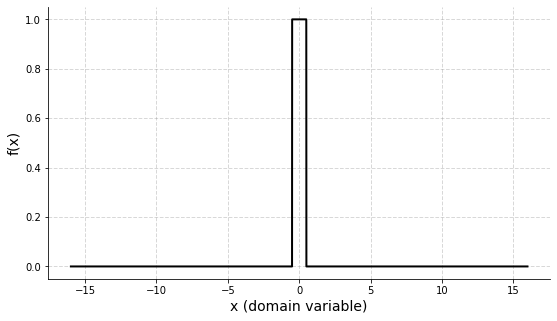

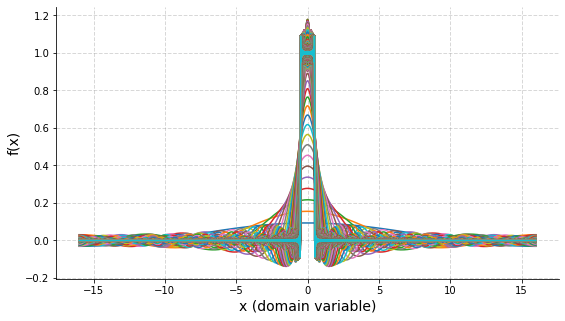

/tmp/ipykernel_4800/4134795338.py:72: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c[indx] = (np.complex(A[indx-nterms],0) +  np.complex(0,-B[indx-nterms]))/2
/tmp/ipykernel_4800/4134795338.py:73: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c[nterms-indx_r] = (np.complex(A[indx-nterms],0) +  np.complex(0,B[indx-nterms

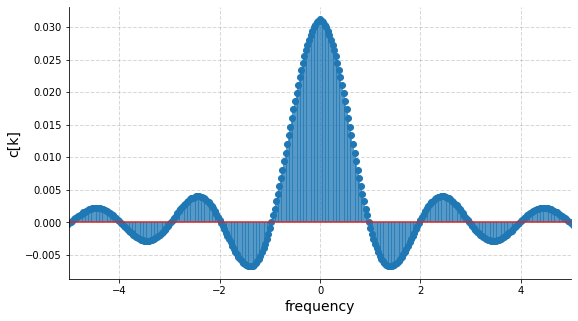

In [3]:
# define domain
dx = 0.0001
L = 16
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
deltax = 2*L/n
nquart = int(np.floor(n/4/L))

# define hat function
f = np.zeros_like(x)
f[int(n/2)-nquart:int(n/2)+nquart] = np.ones(2*nquart,)
# f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0, nquart)

dx = 2*L/len(x)

# plot signal
fig, ax = plt.subplots(figsize=[9,5])
LW = 2
FS = 14
ax.plot(x, f, '-', color='k', linewidth=LW)
ax.set_xlabel('x (domain variable)',fontsize=14)
ax.set_ylabel('f(x)',fontsize=FS) # A.U stands for Arbitrary Units
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

# plot fit
fig, ax = plt.subplots(figsize=[9,5])
LW = 2
ax.plot(x, f, '-', color='k', linewidth=LW)

# compute Fourier Series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx/(L)
fFS = A0/2

nterms = 1000
A = np.zeros(nterms)
B = np.zeros(nterms)

ERR = np.zeros(nterms+1)
ERR[0] = np.linalg.norm(f-fFS)/np.linalg.norm(f)
for k in range(nterms):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx/L
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx/L
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)  
    ERR[k+1] = np.linalg.norm(f-fFS)/np.linalg.norm(f)
    ax.plot(x, fFS, '-')

ax.set_xlabel('x (domain variable)',fontsize=14)
ax.set_ylabel('f(x)',fontsize=FS) # A.U stands for Arbitrary Units
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
plt.show()

# plot coeffs
fig, ax = plt.subplots(figsize=[9,5])
LW = 2

c = np.zeros(2*nterms+1,dtype="complex")
indx_r = 0
for indx in range(nterms,2*nterms):
    if indx == nterms:
        c[indx] = A0/2
    else:
        indx_r = indx_r + 1
        c[indx] = (np.complex(A[indx-nterms],0) +  np.complex(0,-B[indx-nterms]))/2
        c[nterms-indx_r] = (np.complex(A[indx-nterms],0) +  np.complex(0,B[indx-nterms]))/2

        c[indx] = (A[indx-nterms] -1j*B[indx-nterms])/2
        c[nterms-indx_r] = (A[indx-nterms] +1j*B[indx-nterms])/2

faxis = np.arange(-nterms, nterms+1)/2/L
ax.stem(faxis, c)
ax.set_xlabel('frequency',fontsize=14)
ax.set_ylabel('c[k]',fontsize=FS) # A.U stands for Arbitrary Units
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
plt.xlim([-5,5])
plt.show()